# In this file I will do EDA of Intrusion Dataset

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from EDA_STEPS.basic_inspection import DataInspector, DataSummaryStrategy, DataTypesStrategy
from EDA_STEPS.missing_value_analysis import SimpleMissingValueAnalysis
from EDA_STEPS.univariet_analysis import UnivarietStrategyAnalyzer, NumericalFeatureAnalysisStrategy, CategoricalFeatureAnalysisStrategy
from EDA_STEPS.bivarietanalysis import BivarietAnalyzer, NumericalVsNumerical, CategoricalVsNumerical
from EDA_STEPS.multivarietanalysis import SimpleMultivarietAnalysis


##### Loading the data

In [40]:
df = pd.read_csv(r"D:\Python\DATASCIENCE\DATA\hacking_dataset.csv")

##### Lets do data type inspection

In [41]:
data_inspector = DataInspector(DataTypesStrategy())
data_inspector.execute_inspection(df)


Data Types & Nun-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135973 entries, 0 to 135972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     135973 non-null  int64  
 1   protocol_type                135973 non-null  object 
 2   service                      135973 non-null  int64  
 3   flag                         135973 non-null  int64  
 4   src_bytes                    135973 non-null  int64  
 5   dst_bytes                    135973 non-null  int64  
 6   land                         135973 non-null  int64  
 7   wrong_fragment               135973 non-null  int64  
 8   urgent                       135973 non-null  int64  
 9   hot                          135973 non-null  int64  
 10  num_failed_logins            135973 non-null  int64  
 11  logged_in                    135973 non-null  int64  
 12  num_compromised             

# 1. Insights
- There are total entries **135972** & **41** features in this dataset.
- **Datatypes**: There are *15 float64*,*25 int64* and *2 object* features.
    - **Categorical features**: `xAttack` and `protocol_type` are categorical.
    - **Numerical features**: the rest of features are numerical.

##### Lets find the statistical summary

In [42]:
data_inspector.set_strategy(DataSummaryStrategy())
data_inspector.execute_inspection(df)

Statistical Summary (Numerical features)
            duration        service           flag     src_bytes  \
count  135973.000000  135973.000000  135973.000000  1.359730e+05   
mean      282.887801      32.333794       2.547800  4.271899e+04   
std      2538.078860      16.439942       1.141178  5.650402e+06   
min         0.000000       1.000000       1.000000  0.000000e+00   
25%         0.000000      20.000000       2.000000  0.000000e+00   
50%         0.000000      25.000000       2.000000  4.400000e+01   
75%         0.000000      50.000000       4.000000  2.760000e+02   
max     57715.000000      70.000000      11.000000  1.379964e+09   

          dst_bytes           land  wrong_fragment         urgent  \
count  1.359730e+05  135973.000000   135973.000000  135973.000000   
mean   1.847135e+04       0.000221        0.021681       0.000147   
std    3.870581e+06       0.014852        0.247276       0.016271   
min    0.000000e+00       0.000000        0.000000       0.000000   
2

# 2. Statistical Summary 
- **Categorical features**: 
    - The target variable `xAttack` has five unique values.
        - `normal` has 71672 entries.
        - `dos` has 49259 entries.
        - `probe` has 12709 entries.
        - `r2l` has 2194 entries.
        - `u2r` has 139 entries.
    - dont show yiur weakness to others`Issues & Addressing Decission`: I think I have to drop the three classes. 
        - `probe`: Due to low amount of data.
        - `r2l`: Due to low amount of data.
        - `u2r`: Due to low amount of data.
        - **Drop some of the rows**: 
            - Becouse it has 22413 difference with `dos` class.
    - The feature `protocol_type` has three classes.
        - `icmp`: has 111057 entries.
        - `udp`: has 16147 entries.
        - `tcp`: has 8769 entries.
- **Numerical features**: 
    - `duration`: has the mean of 282.9 & standered dev of 2538.078 which indecates the signigicant spread.  
    -  `service`: has the mean of 32.4 & standered dev of 16.4 which shows the good spread.
    - ...
    - `dst_host_srv_rerror_rate`: has the mean of 0.128325 & standered dev of 0.327617 which indecates significant spread.


## Let Do missing value analysis

Missing Value Columns.
Series([], dtype: int64)

Visualizing the missing values...


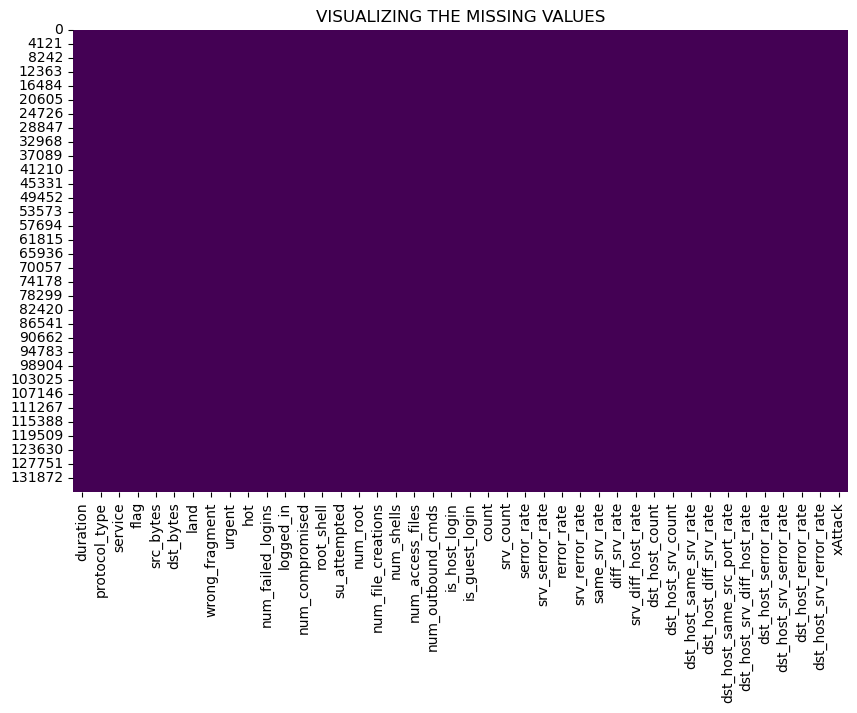

In [43]:
smplmva = SimpleMissingValueAnalysis()

# inspect the missing value if any column have
smplmva.analyze(df)

# Insights of Missing Values of Heatmap
- `No missing values`: 
    - So thankfully we have no missing values.

### Univariet analysis

d:\Python\DATASCIENCE\EDA_STEPS\univariet_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


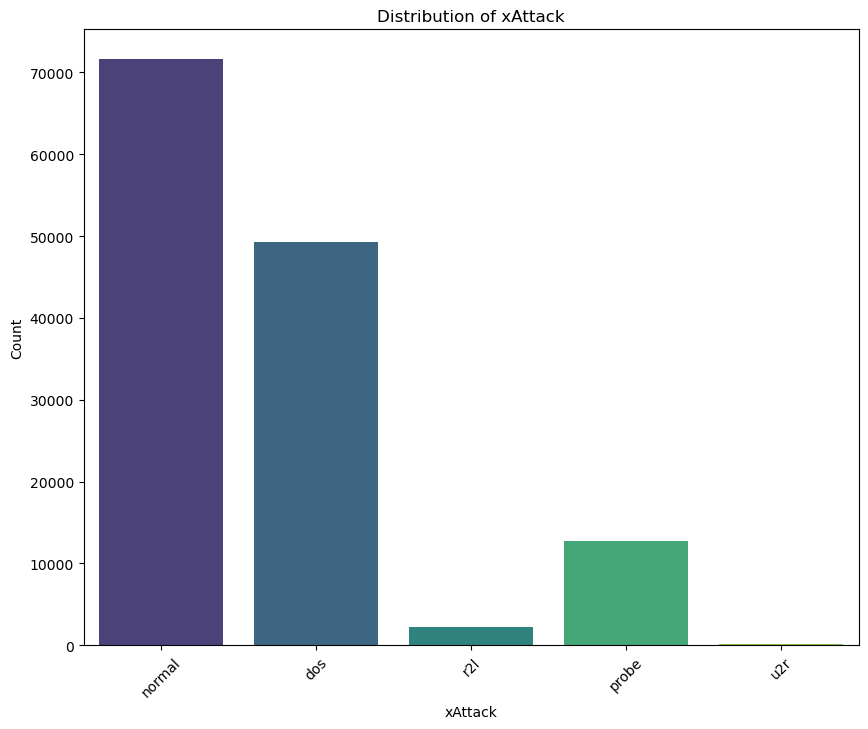

In [44]:
analyzer = UnivarietStrategyAnalyzer(CategoricalFeatureAnalysisStrategy())
analyzer.execute_analysis(df, "xAttack")

# Univariet Analysis Insights
- **Categorical features**: 
    - The target variable `xAttack` has five unique values.
        - `normal` has 71672 entries.
        - `dos` has 49259 entries.
        - `probe` has 12709 entries.
        - `r2l` has 2194 entries.
        - `u2r` has 139 entries.
    - `Issues & Addressing Decission`: I think I have to drop the three classes. 
        - `probe`: Due to low amount of data.
        - `r2l`: Due to low amount of data.
        - `u2r`: Due to low amount of data.
        - **Drop some of the rows**: 
            - Becouse it has 22413 difference with `dos` class.
- 2.1 **Balance problem**:
    - So looking at figure we can say it easily that our dataset is'nt balanced.




### 3. Target variable Issue:
- Here we can see that our target variable is'nt balanced.
#### **Solution**:
- Dropping the three ['probe','r2l','u2r'] classes from df.

In [45]:
df = df.query("xAttack not in ['probe','r2l','u2r']")
# the above code simplly remove 'probe','r2l','u2r' classes from df

d:\Python\DATASCIENCE\EDA_STEPS\univariet_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


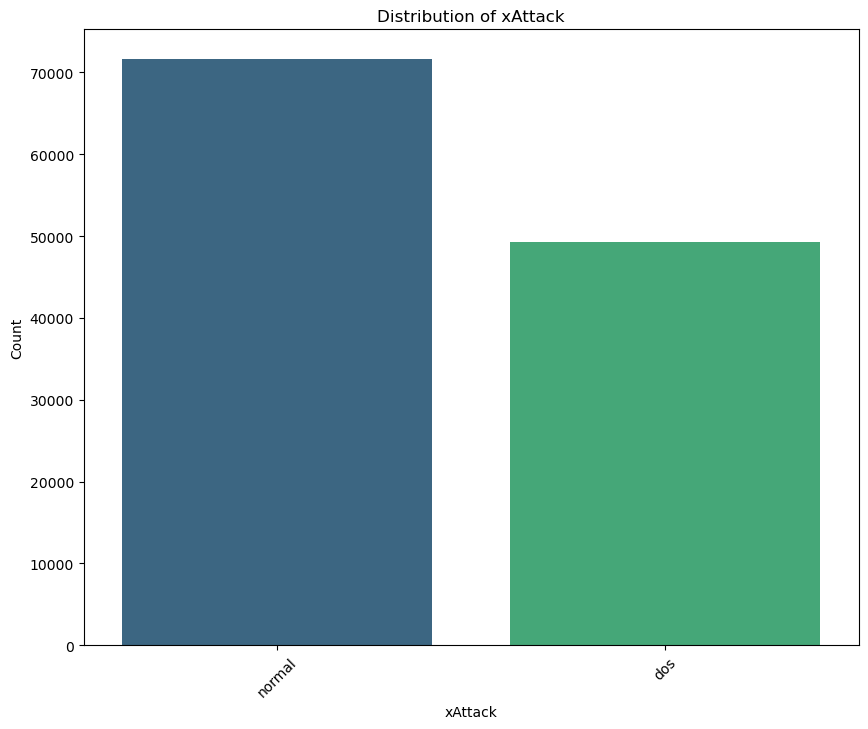

In [46]:
analyzer.execute_analysis(df, "xAttack")

# Bivariet Analysis

random_stat = 42; means that whenever we divide a specific data set will constant division. 

random_

In [47]:
bivariet_analyzer = BivarietAnalyzer(CategoricalVsNumerical())

In [48]:
columns = df.columns
columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

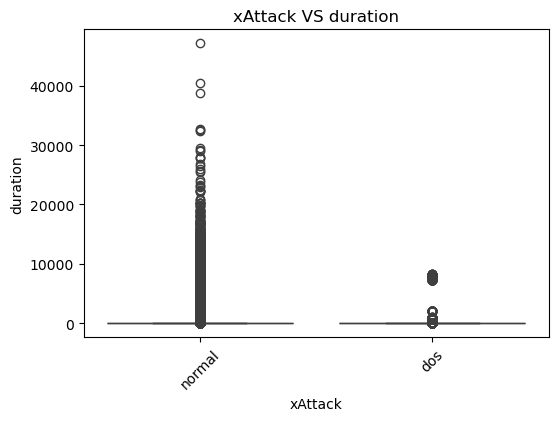

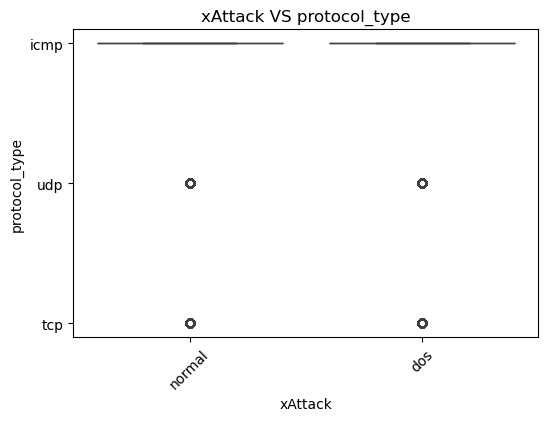

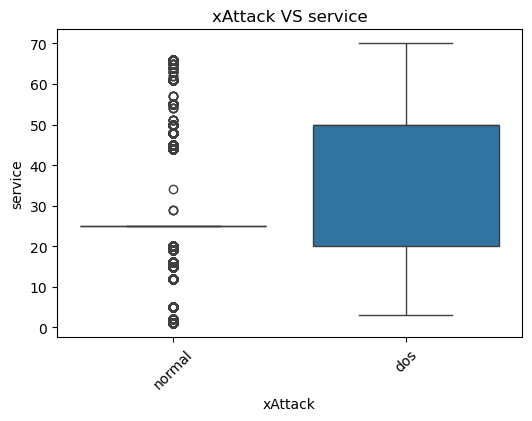

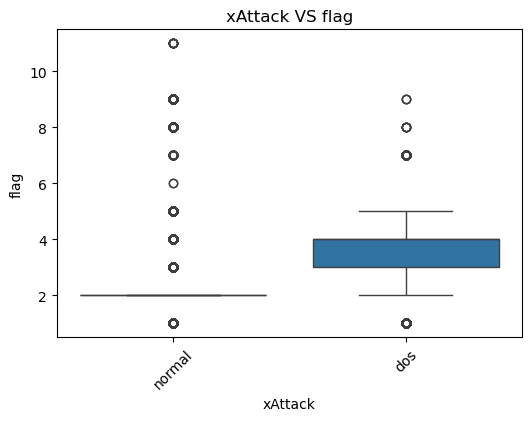

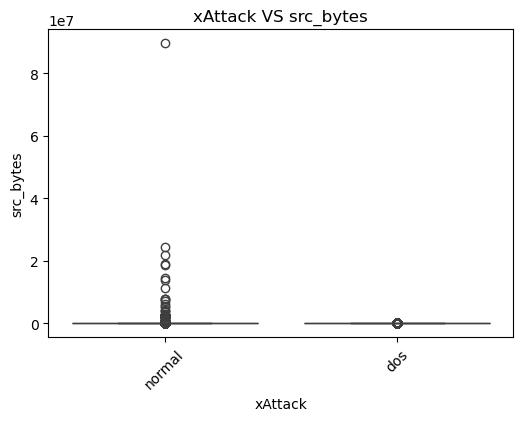

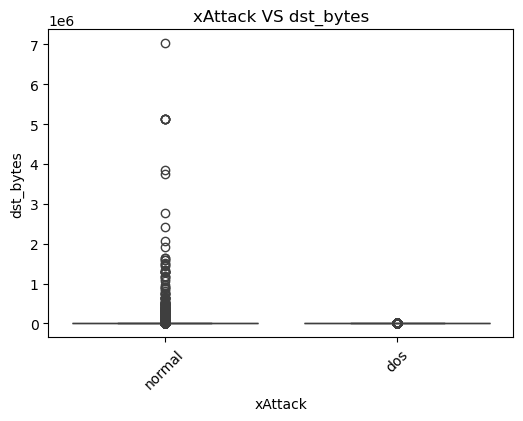

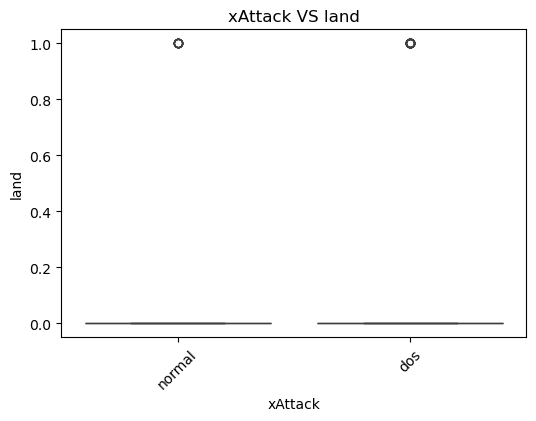

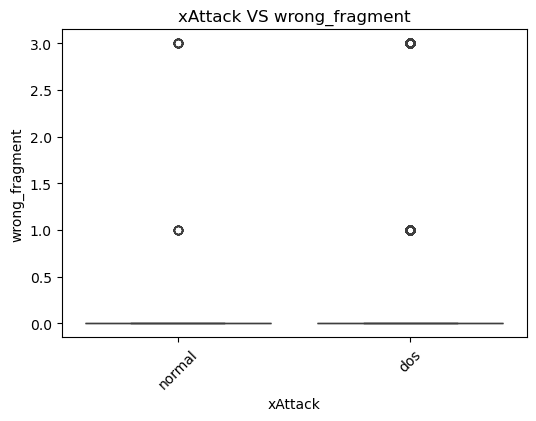

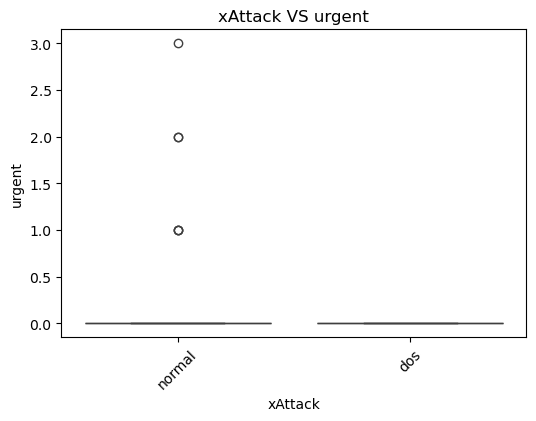

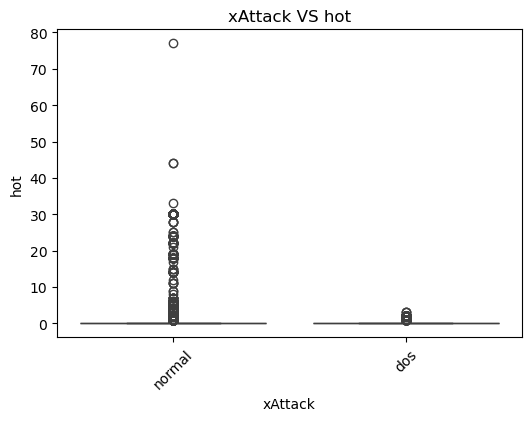

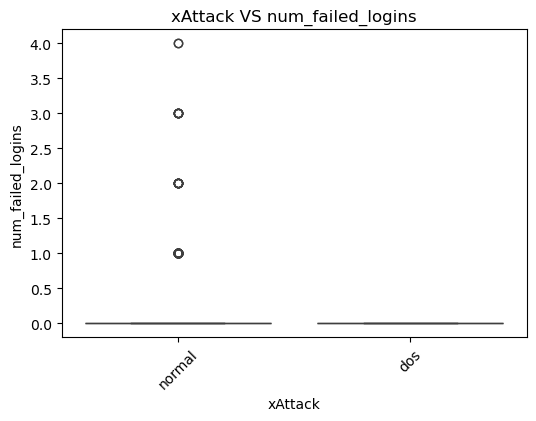

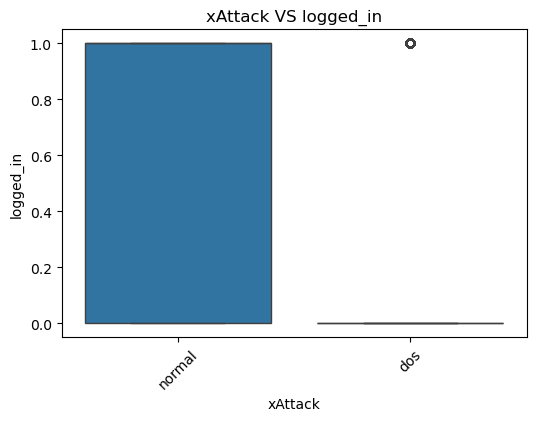

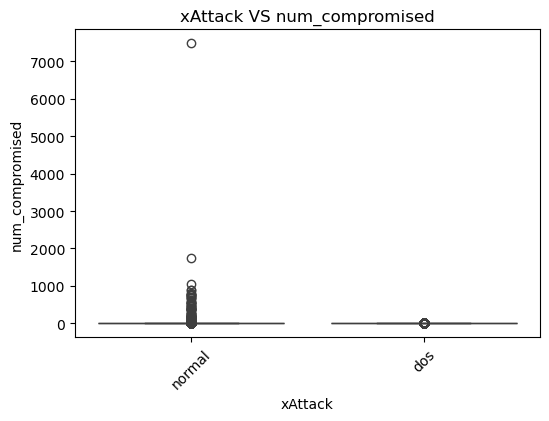

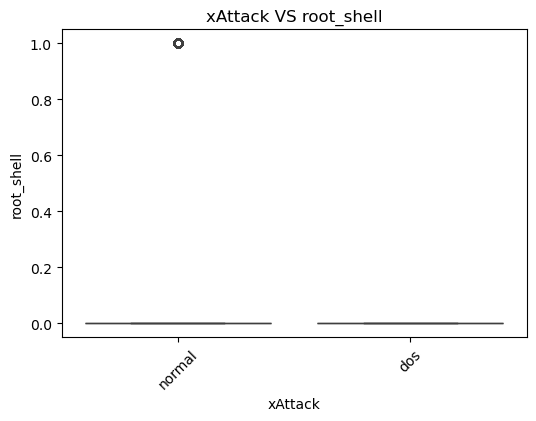

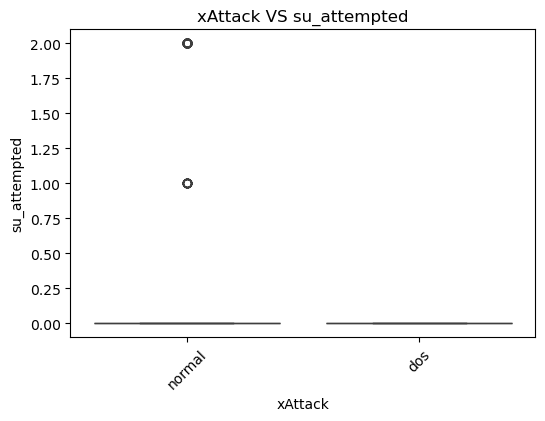

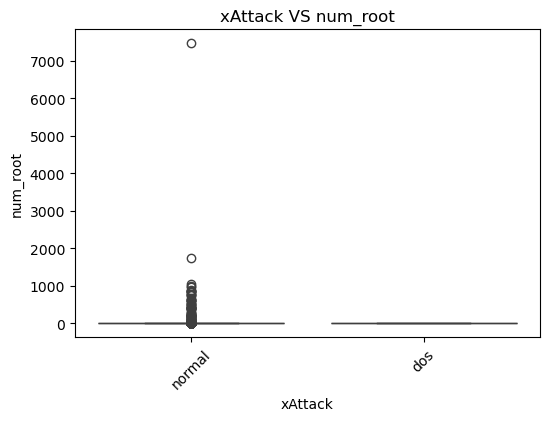

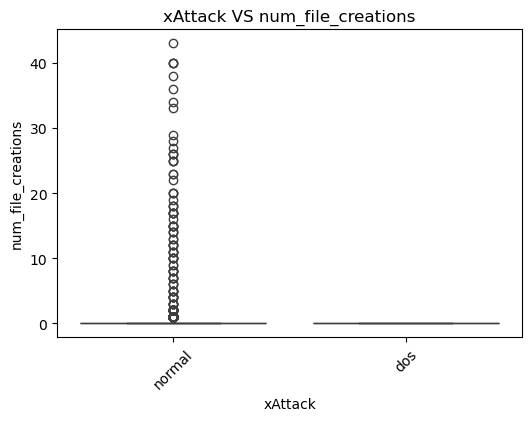

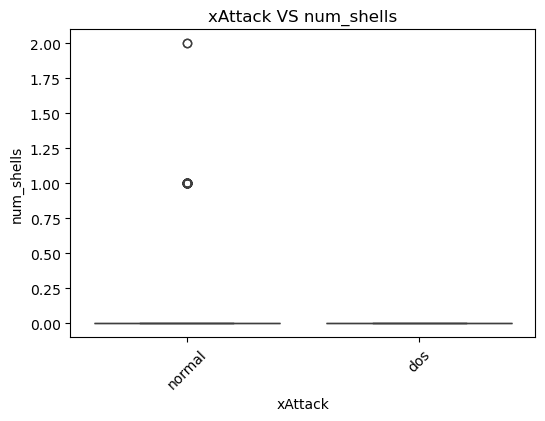

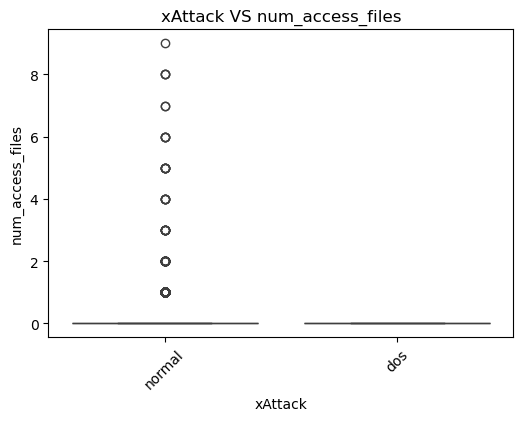

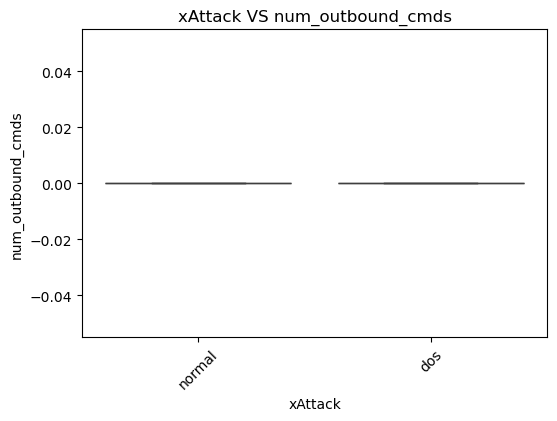

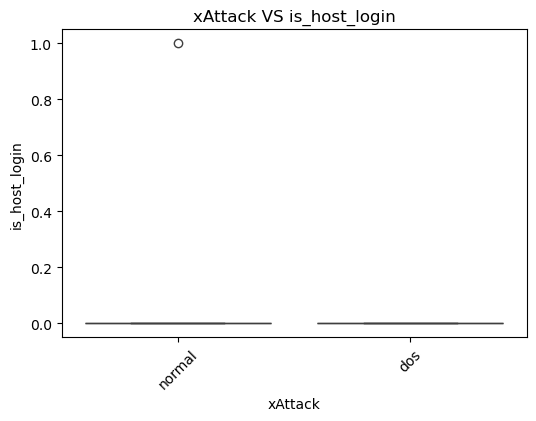

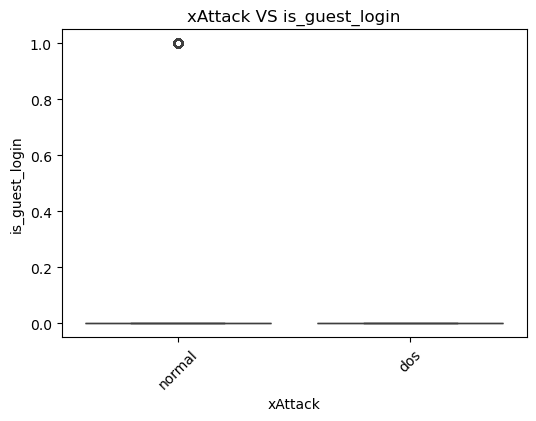

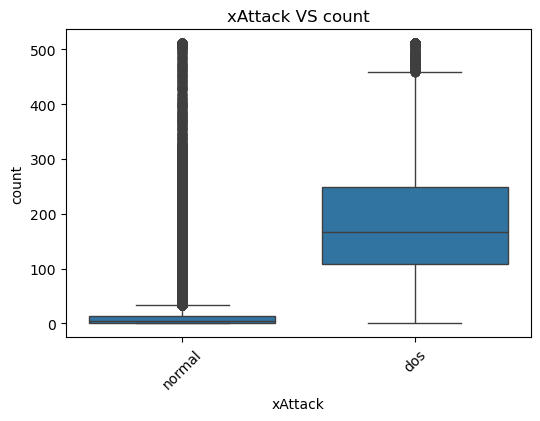

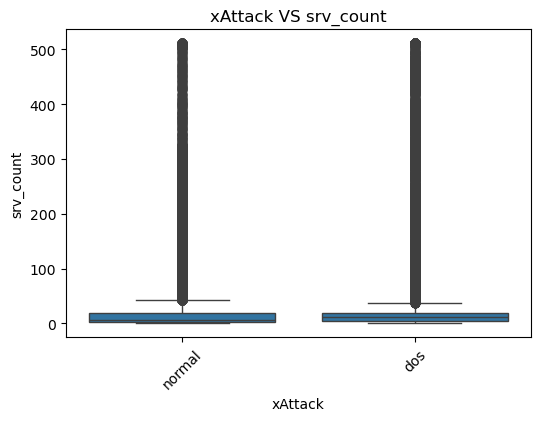

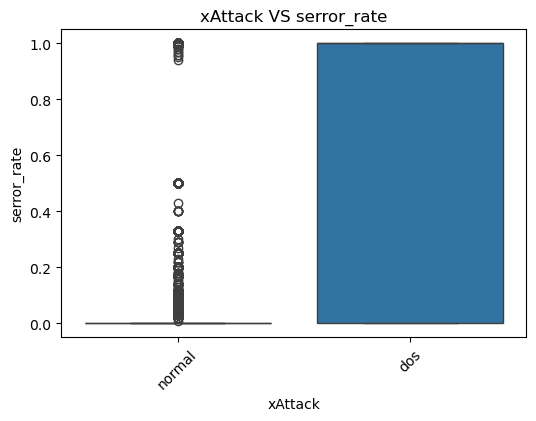

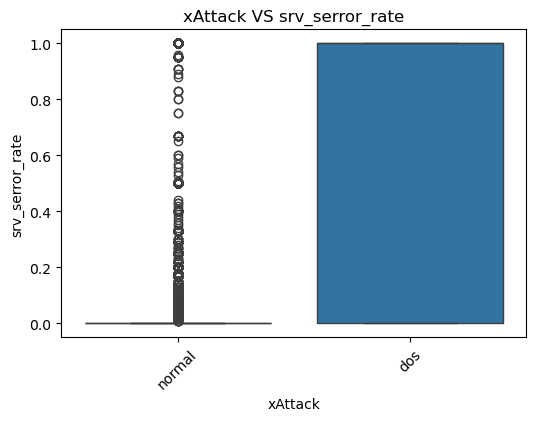

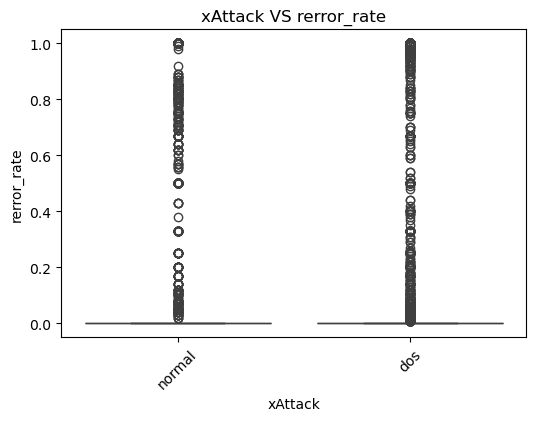

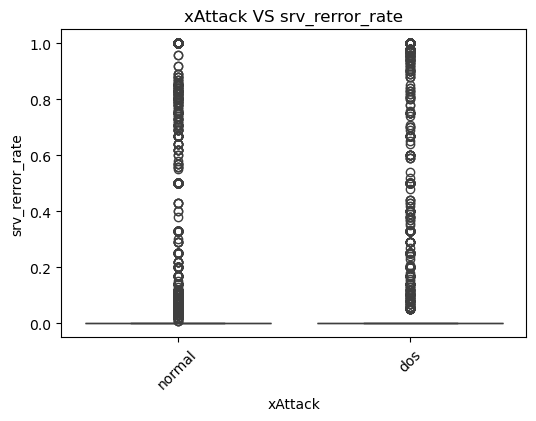

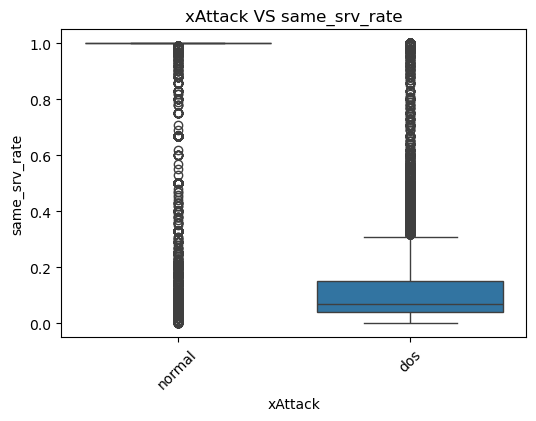

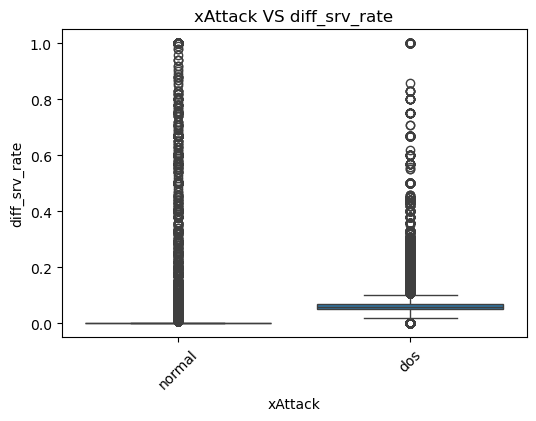

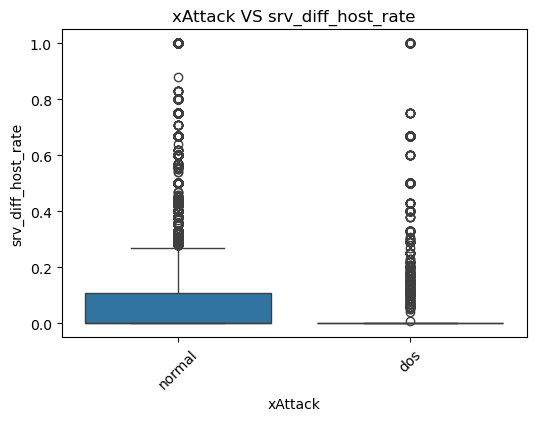

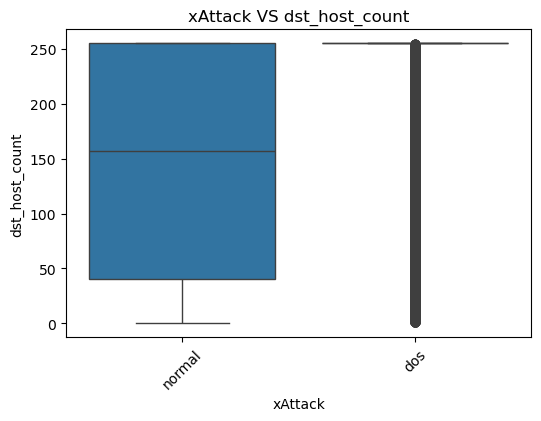

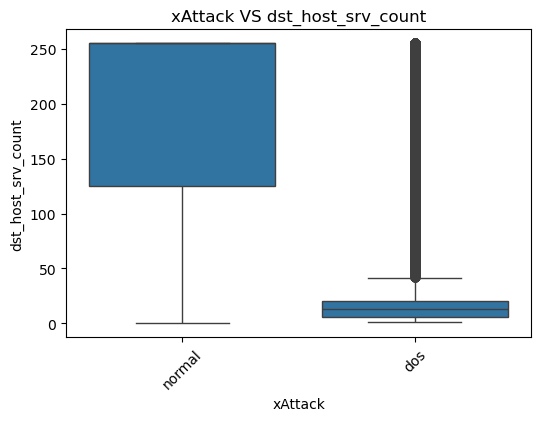

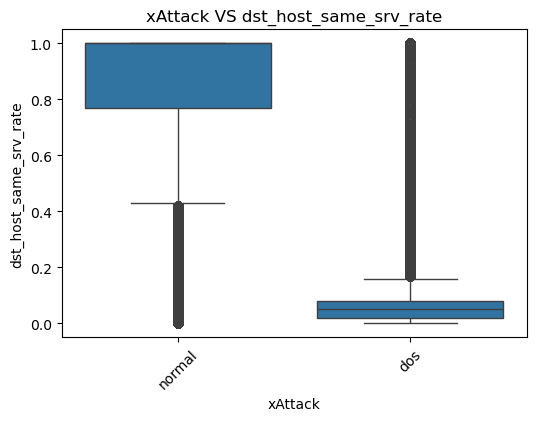

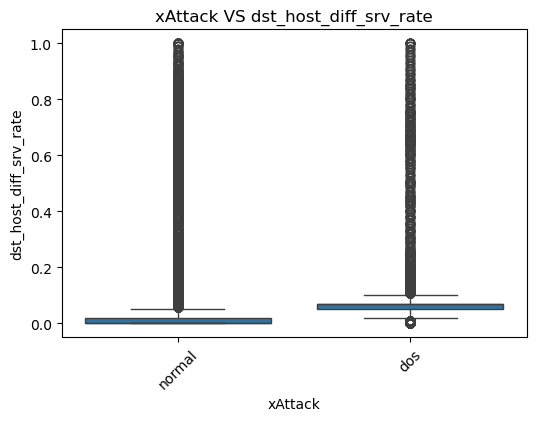

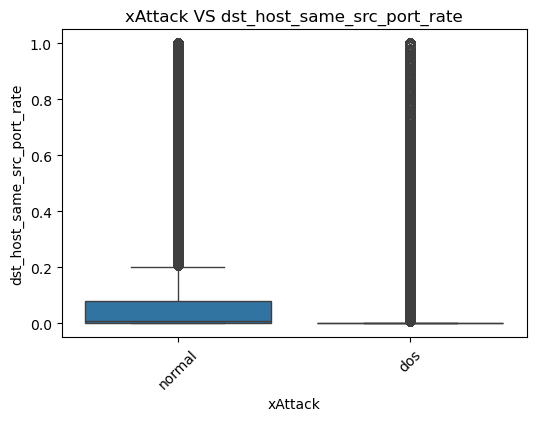

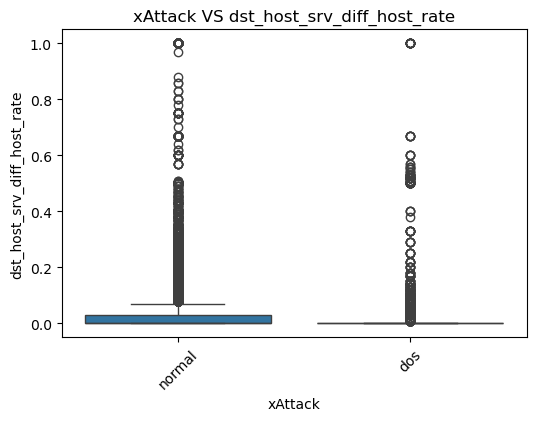

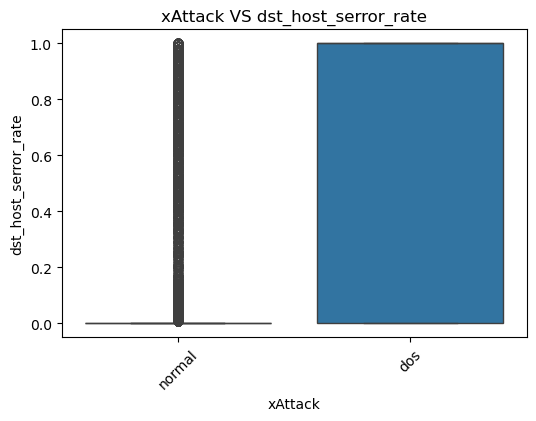

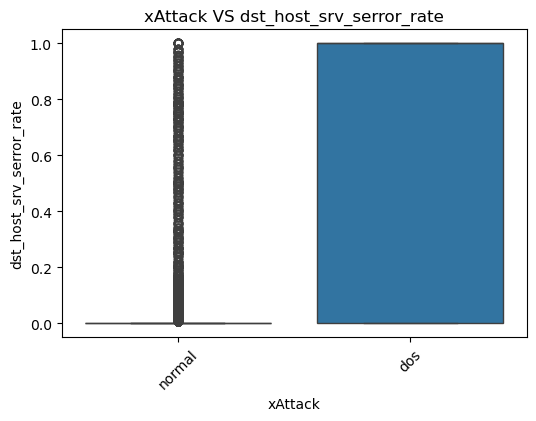

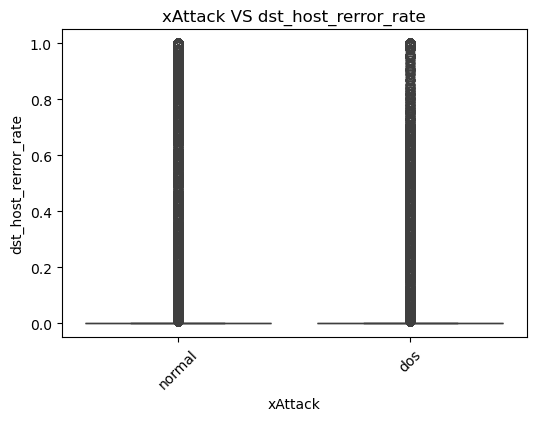

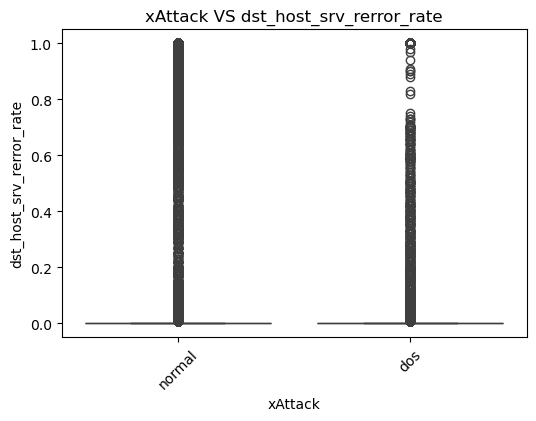

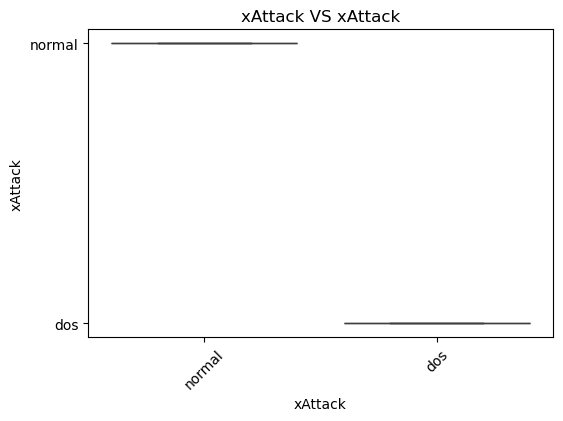

In [49]:
for c in columns:
    bivariet_analyzer.execute_analysis(df, "xAttack", c)
    

In [61]:
le = LabelEncoder()
df['xAttack'] = le.fit_transform(df['xAttack'])

In [62]:
df['protocol_type'] = le.fit_transform(df['protocol_type'])

In [63]:
columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

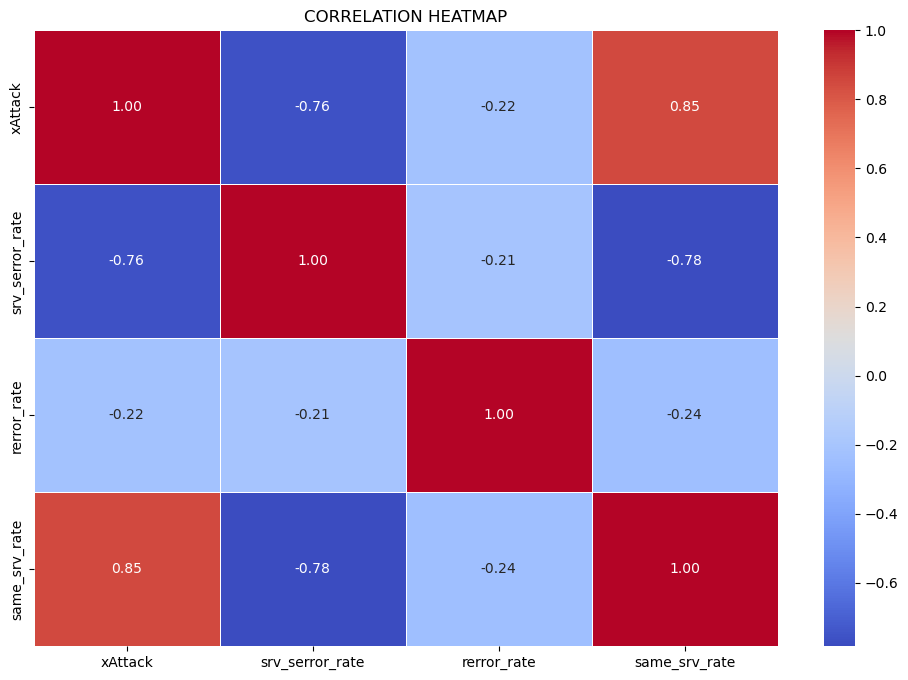

In [64]:
mltvariet = SimpleMultivarietAnalysis()
mltvariet.generate_corelation_heatmap(
    df[['xAttack', 'srv_serror_rate', 'rerror_rate', 'same_srv_rate']])

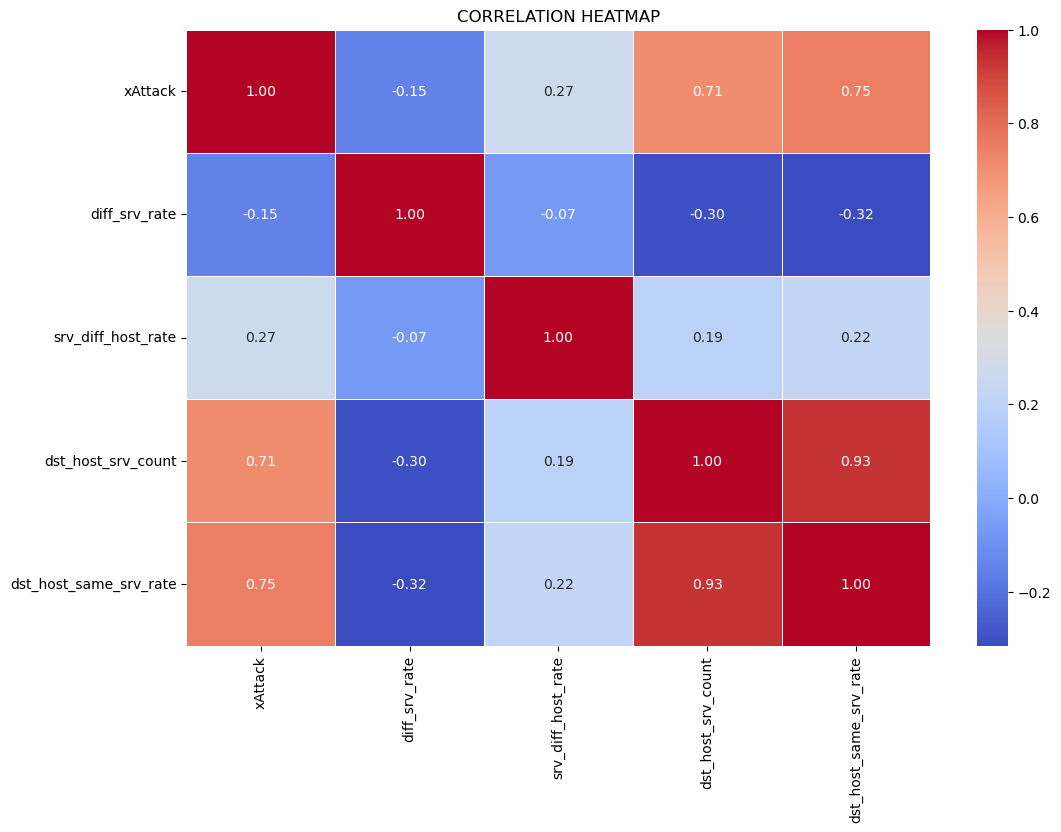

In [65]:
mltvariet.generate_corelation_heatmap(
    df[['xAttack', 'diff_srv_rate', 'srv_diff_host_rate',  'dst_host_srv_count', 'dst_host_same_srv_rate']])

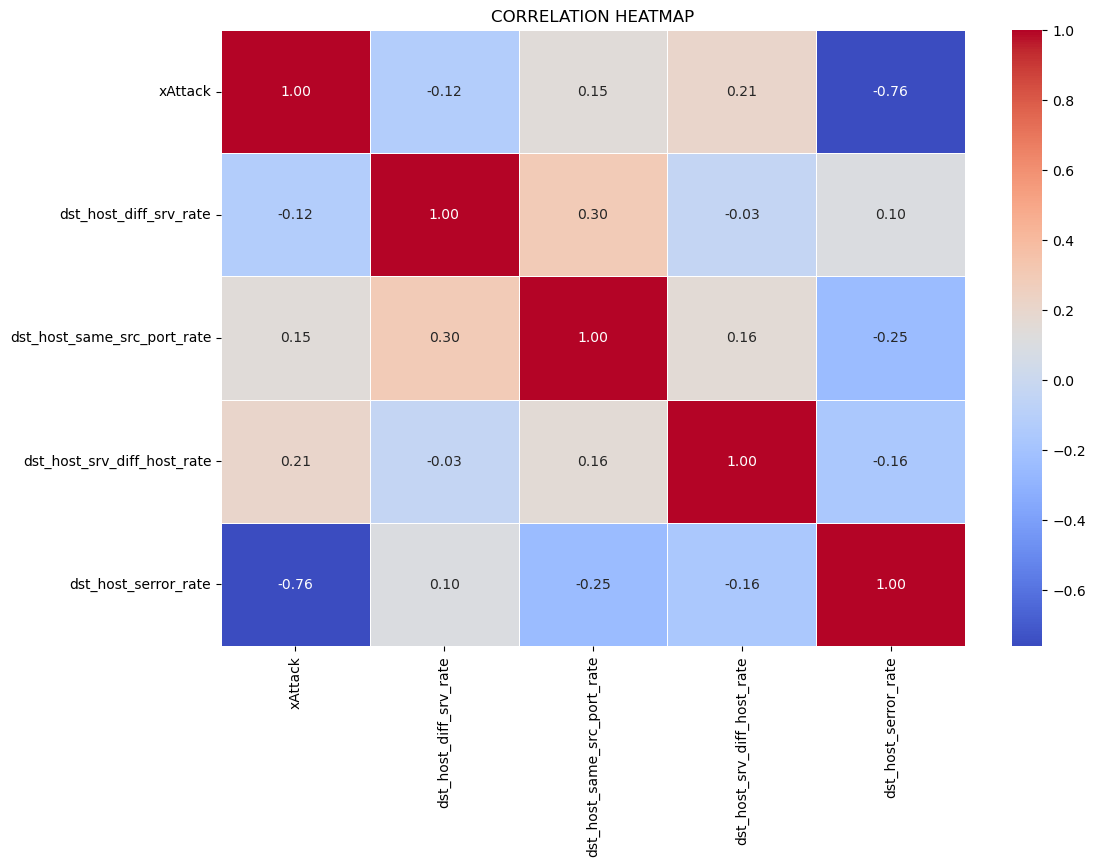

In [66]:
mltvariet.generate_corelation_heatmap(
    df[['xAttack', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate']])

# Heatmap Insights
- Based on the heatmap I can say that 
    - `protocol_type`: corr of protocol_type and xAttack is 0.22.
    - `dst_host_srv_count`: corr of dst_host_srv_count and xAttack is 0.71.
    - `srv_count`: corr of srv_count and xAttack is -0.03.
    - `flag`: corr of flag and xAttack is -0.059.
    - `src_bytes`: corr of src_bytes and xAttack is 0.02.
    - `dst_bytes`: corr of dst_bytes and xAttack is 0.04.
    - `land` : corr of land and xAttack is -0.01.
    - `wrong_fragment`:corr of wrong_fragment and xAttack is -0.11.
    - `urgent`: corr of urgent and xAttack is 0.01.
    - `hot`: corr of hot and xAttack is 0.05.
    - `num_failed_logins`: corr of num_failed_logins and xAttack is 0.02.
    - `logged_in`: corr of logged_in and xAttack is 0.68.
    - `num_compromised`: corr of num_compromised and xAttack is 0.01.
    - `root_shell`: corr of root_shell and xAttack is 0.03.
    - `su_attempted`: corr of su_attempted and xAttack is 0.02.
    - `num_root`: corr of num_root and xAttack is 0.01.
    - `num_file_creations`: corr of num_file_creations and xAttack is 0.02.
    - `num_shells`: corr of num_shells and xAttack is 0.01.
    - `num_access_files`: corr of num_access_files and xAttack is 0.04.
    - `num_outbound_cmds`: corr of num_outbound_cmds and xAttack is .
    - `is_host_login`: corr of is_host_login and xAttack is .
    - `is_guest_login`: corr of is_guest_login and xAttack is 0.00.
    - `count`, `: corr of count and xAttack is -0.68 0.07.
    - `srv_count`: corr of rv_count and xAttack is -0.03.
    -

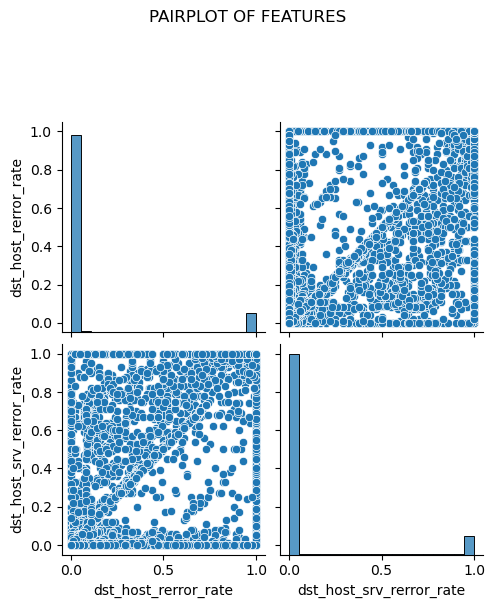

In [54]:
mltvariet.generate_pairplot(
    df[['xAttack', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']])